In [1]:
require 'Utils'
require 'nngraph';
require 'loadcaffe'
require 'image'
require 'VGG'
require 'optim'
require 'Net2'
dtype = 'torch.DoubleTensor'

0.12594249100725	


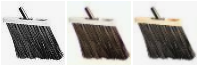

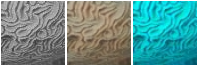

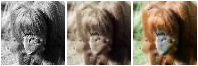

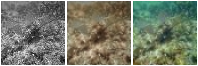

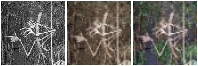

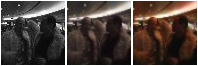

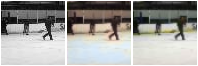

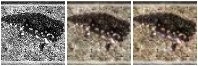

In [2]:
-- checkpoint_1 = torch.load('../../results/checkpoint_class_100.t7')
checkpoint_1 = torch.load('../../arxiv/all_classes_32_3_MSE.t7')
model = checkpoint_1.model
local crit = nn.AbsCriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

num_images = 8;
im_batch = get_validation_batch(num_images)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images*2
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load1 = model.output/2
for i = 1,num_images do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load1[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

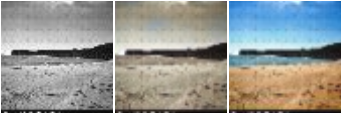

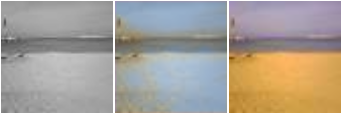

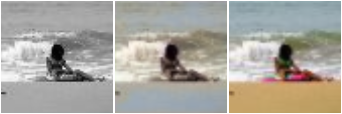

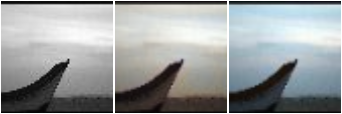

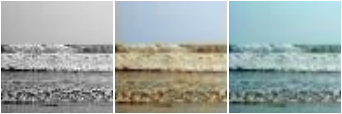

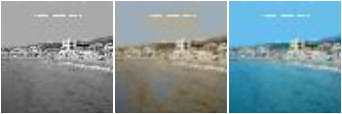

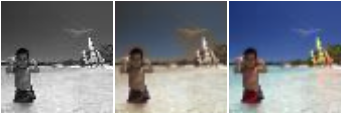

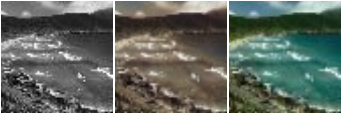

In [4]:
for i = 1,num_images do
    size = 112
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load1[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
collectgarbage()
checkpoint_1 = torch.load('../../results/checkpoint_80.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(4)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,4 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
for i = 1,8 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_40.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_50.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_50.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end